In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
hydrostatics_df=pd.read_excel('/content/hydrostatics.xlsx')
area_df=pd.read_excel('/content/Sectional_Area.xlsx')

In [ ]:
def get_drafts(trim, lcf, lbp, T):
  del_t_aft=(lcf/lbp)*trim
  del_t_fwd=trim-del_t_aft

  T_aft=T-del_t_aft
  T_fwd=T+del_t_fwd

  T_mean=(T_aft+T_fwd)/2
  return T_aft, T_fwd, T_mean



def get_lcf(T_mean, hydrostatics_df):
  lcf=np.interp(T_mean,hydrostatics_df['z'],hydrostatics_df['LCF'])
  return lcf



def get_sectional_area(area_df, df):
    result = []
    z_values = area_df.iloc[:,0].to_numpy()
    for _, row in df.iterrows():
        x = row['x']
        z = row['t']

        area_values = area_df[x].to_numpy()     # Sectional Area curve at x
        interpolated_area = np.interp(z, z_values, area_values) # Passing z, area arrays to interpolate

        result.append({'x': x, 'z': z, 'area': interpolated_area})

    return pd.DataFrame(result)



def get_buoyancy(area_df, T_aft, T_fwd):

  x_values=area_df.columns[1:].astype(float)
  x0=x_values[0]
  xl=x_values[-1]

  t=[]
  for i in range(len(x_values)):
    t.append(T_aft+((T_fwd-T_aft)/(xl-x0))*(x_values[i]-x0))

  df=pd.DataFrame({'x':x_values,'t':t})
  result = get_sectional_area(area_df, df)

  underwater_volume=np.trapz(result['area'],result['x'])
  buoyancy=1.025*underwater_volume
  lcb=np.trapz(result['area']*result['x'],result['x'])/underwater_volume

  return buoyancy, lcb, result

In [ ]:
# From load curve
W=8329.839706
lcg=68.82575974
lbp=160.8

In [ ]:
T=np.interp(W,hydrostatics_df['Weight'],hydrostatics_df['z'])
lcb=np.interp(T,hydrostatics_df['z'],hydrostatics_df['LCB'])
mctc=np.interp(T,hydrostatics_df['z'],hydrostatics_df['MTC'])
lcf=np.interp(T,hydrostatics_df['z'],hydrostatics_df['LCF'])

print(T)
print(lcf)

2.6821239805088757
84.90911890406238


In [ ]:
trimming_moment=(lcg-lcb)*W
trim=trimming_moment/(mctc*100)  # Initial trim

del_t_aft=(lcf/lbp)*trim
del_t_fwd=trim-del_t_aft
print(trim)

-4.643789788192875


In [ ]:
T_aft=T-del_t_aft
T_fwd=T+del_t_fwd

In [ ]:
print(T_aft)
print(T_fwd)

5.134239025851783
0.4904492376589076


In [ ]:
x_values=area_df.columns[1:].astype(float)

x0=x_values[0]
xl=x_values[-1]

In [ ]:
t=[]
for i in range(len(x_values)):
  t.append(T_aft+((T_fwd-T_aft)/(xl-x0))*(x_values[i]-x0))

df=pd.DataFrame({'x':x_values,'t':t})
print(df)

              x         t
0     -3.600907  5.134239
1     -3.599993  5.134214
2     -3.000146  5.117578
3     -1.800149  5.084297
4     -1.199998  5.067653
..          ...       ...
101  163.814150  0.491176
102  163.820856  0.490990
103  163.827257  0.490813
104  163.833962  0.490627
105  163.840363  0.490449

[106 rows x 2 columns]


In [ ]:
result = get_sectional_area(area_df, df)
print(result)
result.to_excel('sectional areas.xlsx')

              x         z  area
0     -3.600907  5.134239   0.0
1     -3.599993  5.134214   0.0
2     -3.000146  5.117578   0.0
3     -1.800149  5.084297   0.0
4     -1.199998  5.067653   0.0
..          ...       ...   ...
101  163.814150  0.491176   0.0
102  163.820856  0.490990   0.0
103  163.827257  0.490813   0.0
104  163.833962  0.490627   0.0
105  163.840363  0.490449   0.0

[106 rows x 3 columns]


In [ ]:
underwater_volume=np.trapz(result['area'],result['x'])
print(underwater_volume)

8260.755875611565


In [ ]:
buoyancy=1.025*underwater_volume
print(buoyancy)

8467.274772501853


In [ ]:
lcb=np.trapz(result['area']*result['x'],result['x'])/underwater_volume
print(lcb)

69.19638291814351


In [ ]:
i=1
trim=-4.643789788192875
W=8329.839706
lcg=68.82575974
lcb=69.19638291814351
lbp=160.8
T=2.6821239805088757
lcf=84.90911890406238

while(abs(lcg-lcb)/lcg>0.005):
  if(lcb>lcg):
    trim-=0.01
  else:
    trim+=0.01
  T_aft, T_fwd, T_mean=get_drafts(trim, lcf, lbp, T)
  lcf=get_lcf(T_mean, hydrostatics_df)
  buoyancy, lcb, res=get_buoyancy(area_df, T_aft, T_fwd)
  print('Iteration', i,':')
  print('T_mean=', T_mean)
  print('T_aft=', T_aft)
  print('T_fwd=', T_fwd)
  print('Trim=', trim)
  print('Weight=', W)
  print('Buoyancy=', buoyancy)
  print('LCG=', lcg)
  print('LCB=', lcb)
  print('\n\n')
  i+=1
  T=T_mean

Iteration 1 :
T_mean= 2.8126245495976376
T_aft= 5.139519443694075
T_fwd= 0.48572965550120006
Trim= -4.653789788192875
Weight= 8329.839706
Buoyancy= 8467.95623103759
LCG= 68.82575974
LCB= 69.16404758195696





In [ ]:
trim=-4.583789788192877
W=8329.839706
B=8467.95623103759
lcg=68.82575974
lcb=69.16404758195696
T_mean=2.8126245495976376
T_aft=5.139519443694075
T_fwd=0.48572965550120006
i=1

while((abs(W-buoyancy)/W)>0.001):
#while(i<15):
  if(W<B):
    T_mean-=0.01
    T_aft-=0.01
    T_fwd-=0.01
  else:
    T_mean+=0.01
    T_aft+=0.01
    T_fwd+=0.01

  buoyancy, lcb, res=get_buoyancy(area_df, T_aft, T_fwd)
  print('Iteration', i,':')
  print('T_mean=', T_mean)
  print('T_aft=', T_aft)
  print('T_fwd=', T_fwd)
  print('Weight=', W)
  print('Buoyancy=', buoyancy)
  print('LCG=', lcg)
  print('LCB=', lcb)
  print('\n\n')
  i+=1



Iteration 1 :
T_mean= 2.802624549597638
T_aft= 5.129519443694075
T_fwd= 0.47572965550120005
Weight= 8329.839706
Buoyancy= 8434.18957060871
LCG= 68.82575974
LCB= 69.1149370601041



Iteration 2 :
T_mean= 2.792624549597638
T_aft= 5.119519443694076
T_fwd= 0.46572965550120005
Weight= 8329.839706
Buoyancy= 8400.438735131303
LCG= 68.82575974
LCB= 69.06555554569076



Iteration 3 :
T_mean= 2.7826245495976383
T_aft= 5.109519443694076
T_fwd= 0.45572965550120004
Weight= 8329.839706
Buoyancy= 8366.696243842704
LCG= 68.82575974
LCB= 69.01583887477027



Iteration 4 :
T_mean= 2.7726245495976385
T_aft= 5.099519443694076
T_fwd= 0.44572965550120003
Weight= 8329.839706
Buoyancy= 8332.960269690348
LCG= 68.82575974
LCB= 68.96571093882329





In [ ]:
#Final
T_mean= 2.7726245495976385
T_aft= 5.099519443694076
T_fwd= 0.44572965550120003
Weight= 8329.839706
Buoyancy= 8332.960269690348
LCG= 68.82575974
LCB= 68.96571093882329

In [ ]:
trim=T_fwd-T_aft
print(trim)

-4.653789788192876


In [ ]:
print(res)

              x         z  area
0     -3.600907  5.099519   0.0
1     -3.599993  5.099494   0.0
2     -3.000146  5.082822   0.0
3     -1.800149  5.049470   0.0
4     -1.199998  5.032790   0.0
..          ...       ...   ...
101  163.814150  0.446458   0.0
102  163.820856  0.446272   0.0
103  163.827257  0.446094   0.0
104  163.833962  0.445908   0.0
105  163.840363  0.445730   0.0

[106 rows x 3 columns]


In [ ]:
res.to_excel('buoyancy_curve.xlsx')

In [ ]:
weight_data=pd.read_excel('/content/21NA3AI41_Kritika_Load curve.xlsx')
x_values=weight_data['x']
weight=weight_data['W']
x_values_1=res['x']

In [ ]:
areas=np.zeros(len(x_values))
for i in range(len(x_values)):
  areas[i]=np.interp(x_values[i], x_values_1, res['area'])

buoyancy=-1.025*areas

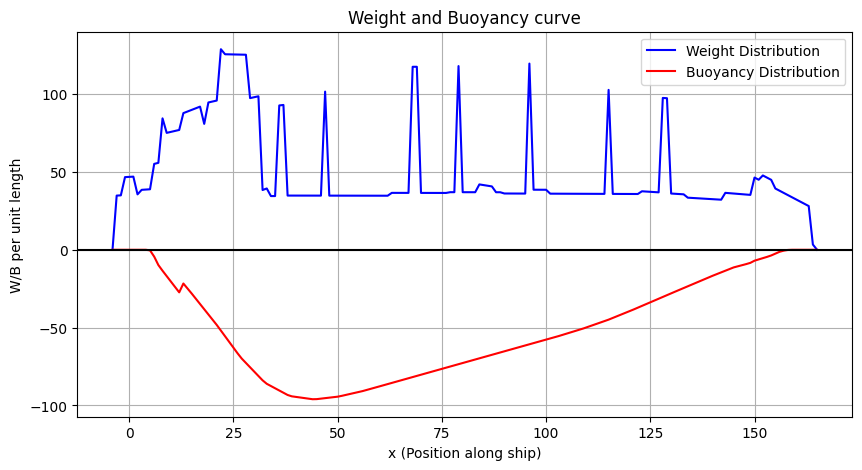

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x_values, weight, label='Weight Distribution', color='b')
plt.plot(x_values, buoyancy, label='Buoyancy Distribution', color='r')
plt.axhline(y=0, color='k')
plt.xlabel('x (Position along ship)')
plt.ylabel('W/B per unit length')
plt.title('Weight and Buoyancy curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
residual=np.trapz(weight+buoyancy,x_values)
print(residual)

0.3831143183757604


In [ ]:
shear_force=np.zeros(len(x_values))
bending_moment=np.zeros(len(x_values))
net_w=weight+buoyancy
for i in range(len(x_values)):
  shear_force[i]=np.trapz(net_w[0:i],x_values[0:i])

for i in range(len(x_values)):
  bending_moment[i]=np.trapz(shear_force[0:i],x_values[0:i])

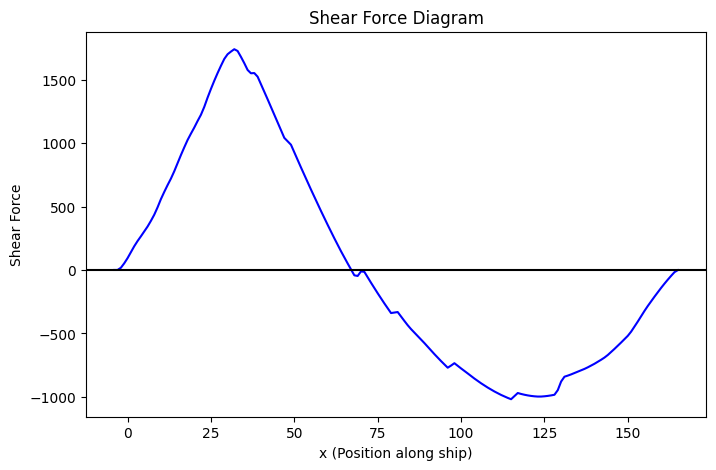

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(x_values, shear_force, label='Shear Force', color='b')
plt.title('Shear Force Diagram')
plt.xlabel('x (Position along ship)')
plt.ylabel('Shear Force')
plt.axhline(y=0, color='k')

Text(0, 0.5, 'Bending Moment')

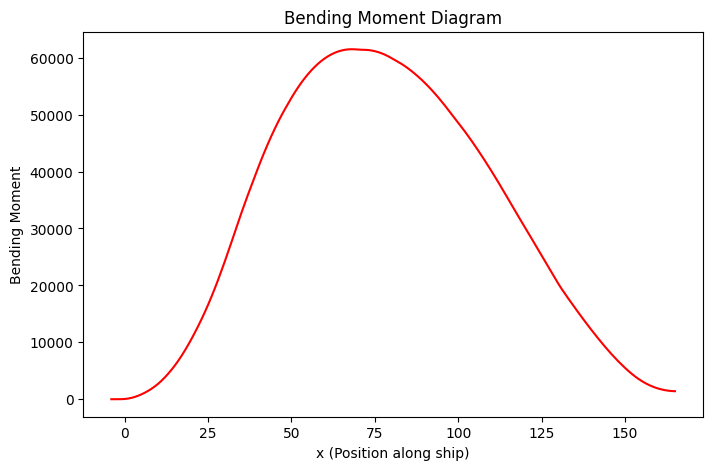

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(x_values, bending_moment, label='Bending Moment', color='r')
plt.title('Bending Moment Diagram')
plt.xlabel('x (Position along ship)')
plt.ylabel('Bending Moment')

In [ ]:
SF_BM=pd.DataFrame({'x':x_values,'Shear Force':shear_force,'Bending Moment':bending_moment})
SF_BM.to_excel('SF_BM.xlsx')
print(SF_BM)

       x  Shear Force  Bending Moment
0     -4     0.000000        0.000000
1     -3     0.000000        0.000000
2     -2    17.399859        0.000000
3     -1    52.279183        8.699929
4      0    93.088554       43.539450
..   ...          ...             ...
165  161  -107.617157     1715.017051
166  162   -76.013399     1590.894680
167  163   -45.817869     1499.079402
168  164   -17.030569     1438.163768
169  165    -1.302931     1406.739549

[170 rows x 3 columns]
